Mean Squared Error (MSE): 12012.93519131241
Root Mean Squared Error (RMSE): 109.60353639966372


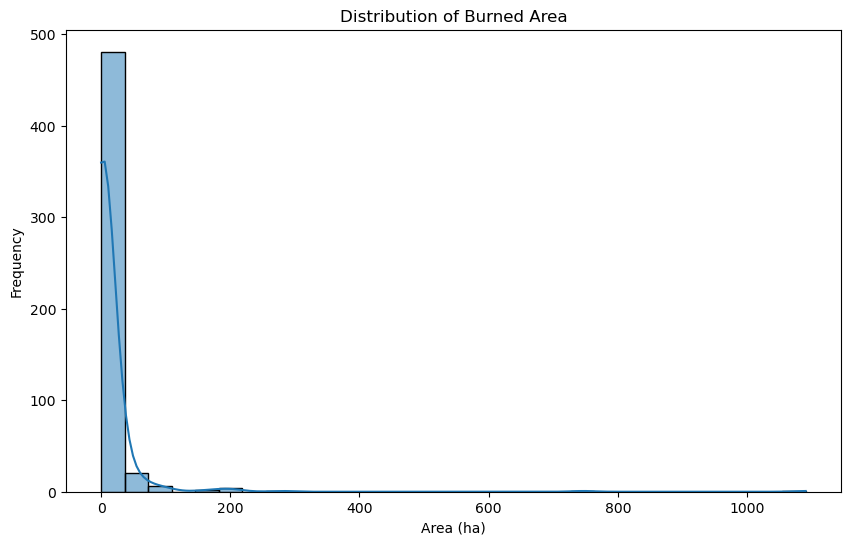

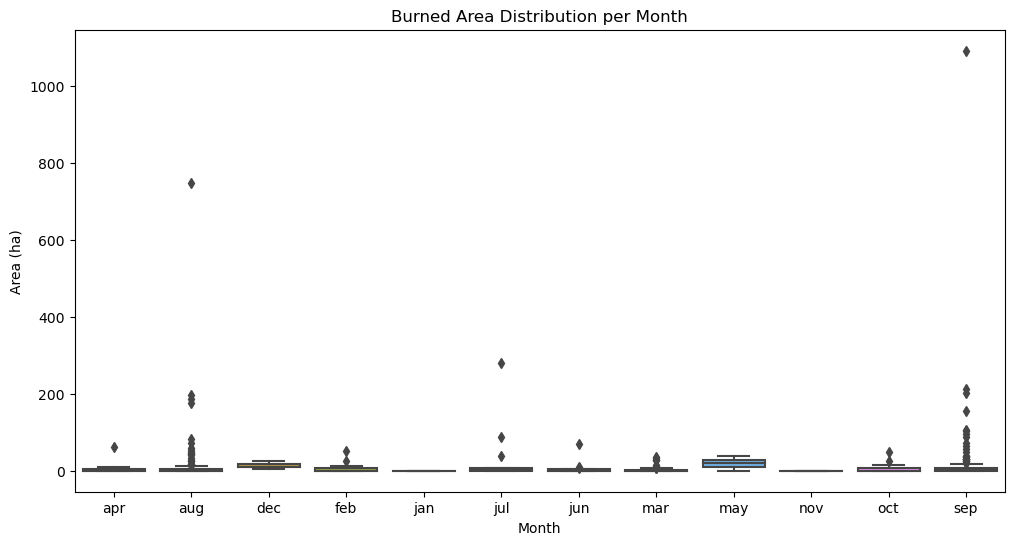

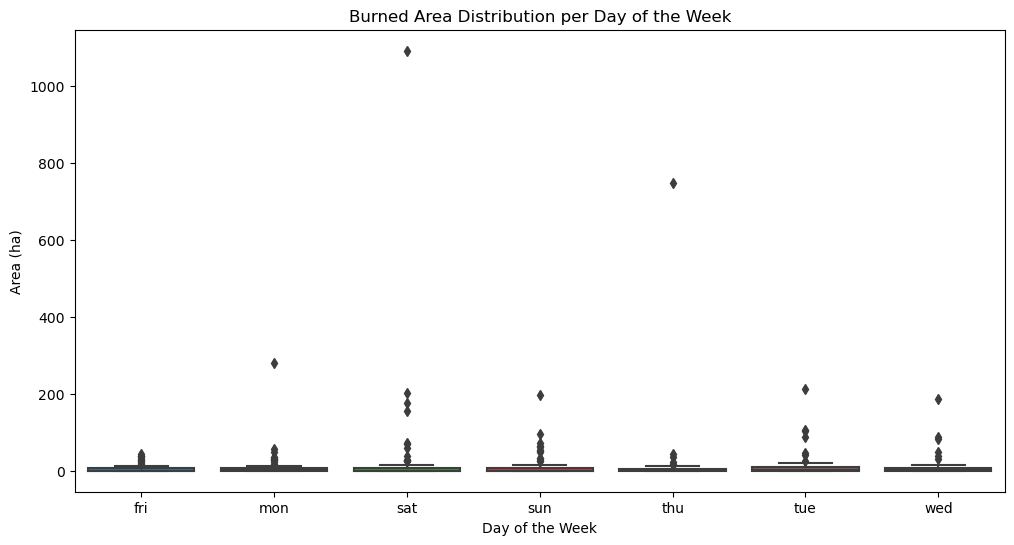

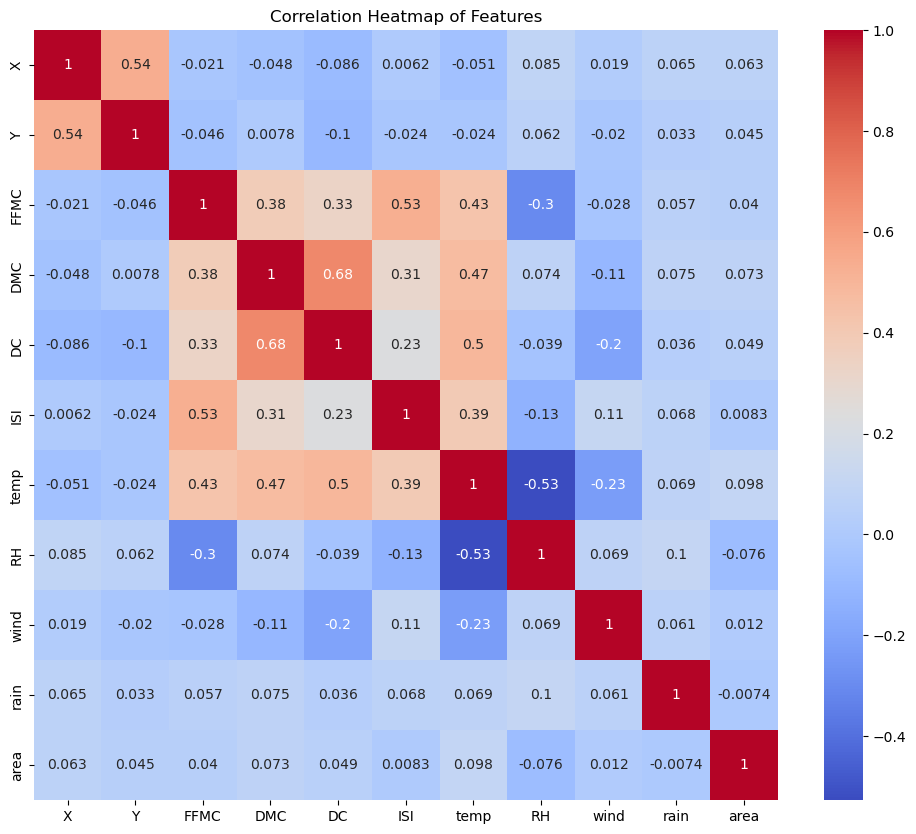

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
data = pd.read_csv('forestfires.csv')

# Preprocess the data
# Convert categorical variables to numerical
# This includes dummy encoding for categorical variables like month and day
data = pd.get_dummies(data)

# Selecting features and target variable
# Assuming 'area' is the target variable and others are features
X = data.drop(['area'], axis=1)
y = data['area']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the training set
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the MSE and RMSE
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Load the dataset
data = pd.read_csv('forestfires.csv')
# Convert month and day to categorical data
data['month'] = data['month'].astype('category')
data['day'] = data['day'].astype('category')

# Plotting

# Histogram of the target variable - area
plt.figure(figsize=(10, 6))
sns.histplot(data['area'], bins=30, kde=True)
plt.title('Distribution of Burned Area')
plt.xlabel('Area (ha)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for the area per month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='area', data=data)
plt.title('Burned Area Distribution per Month')
plt.xlabel('Month')
plt.ylabel('Area (ha)')
plt.show()

# Boxplot for the area per day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='area', data=data)
plt.title('Burned Area Distribution per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Area (ha)')
plt.show()

# Correlation heatmap of the features
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()